In [410]:
import numpy as np
import pylandau
from scipy.stats import moyal
from matplotlib import pyplot as plt
plt.style.use('tdrstyle.mplstyle')

In [411]:
#First energy loss in 3m of iron, as per PDG. Estimate peak offset and scale from PDG plot
MuonEinc = 1000
ELossAvFe = 24
PeakOffsetFe = ELossAvFe/2.875
ScaleLossFe = 2.5
xmax = 25.0
xmin = -5
dx = 0.01
nx = (xmax-xmin)/dx

In [412]:
x_landau = np.arange(xmin, xmax, dx)
y_landau = pylandau.landau(x_landau)

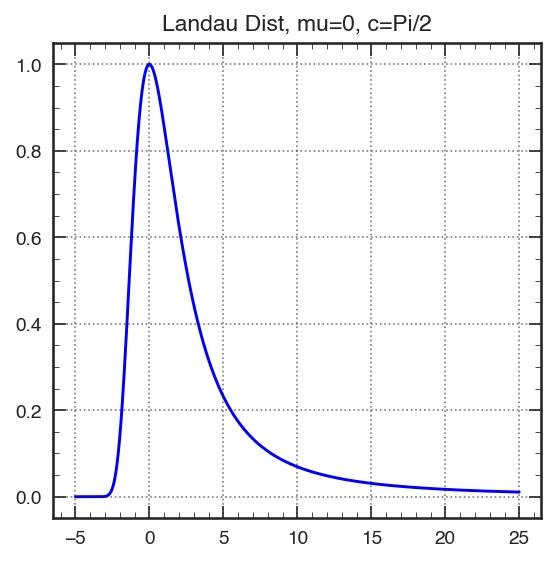

In [413]:
plt.plot(x_landau, y_landau, 'b')
plt.title('Landau Dist, mu=0, c=Pi/2')
plt.show()

In [414]:
ELossY = y_landau
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX

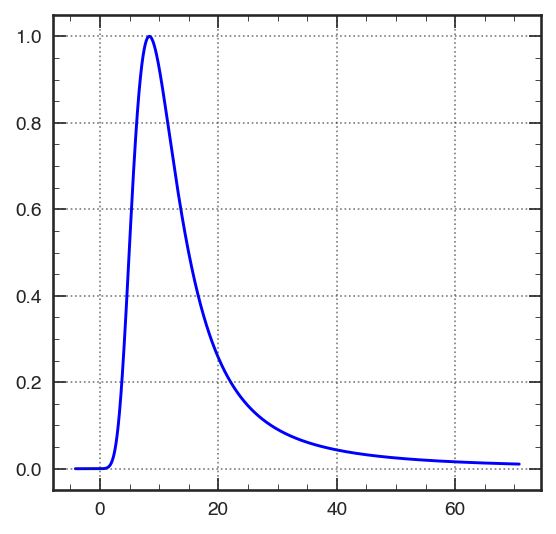

In [415]:
plt.plot(ELossX, ELossY, 'b')

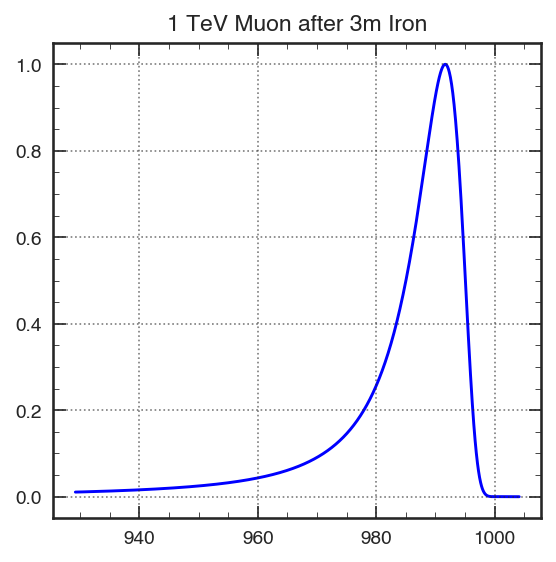

In [416]:
plt.plot(MuonP, ELossY, 'b')
plt.title('1 TeV Muon after 3m Iron')
plt.show()

In [417]:
# Now Tungsten 6m
MuonEinc = 1000
ELossAvW = 116
PeakOffsetW = ELossAvW/2.875
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [418]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

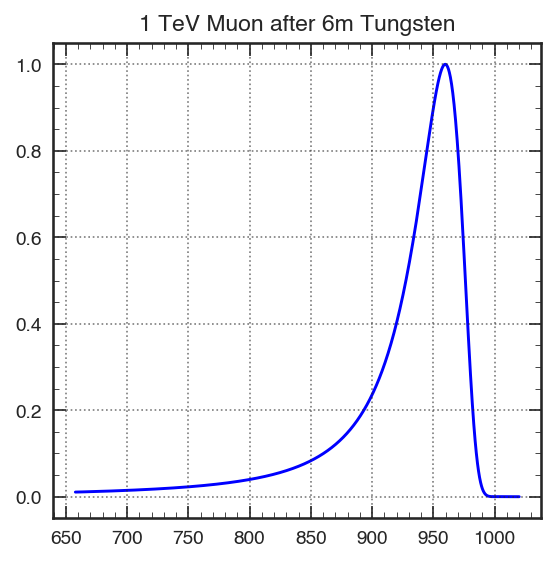

In [419]:
plt.plot(MuonP, ELossY, 'b')
plt.title('1 TeV Muon after 6m Tungsten')
plt.show()

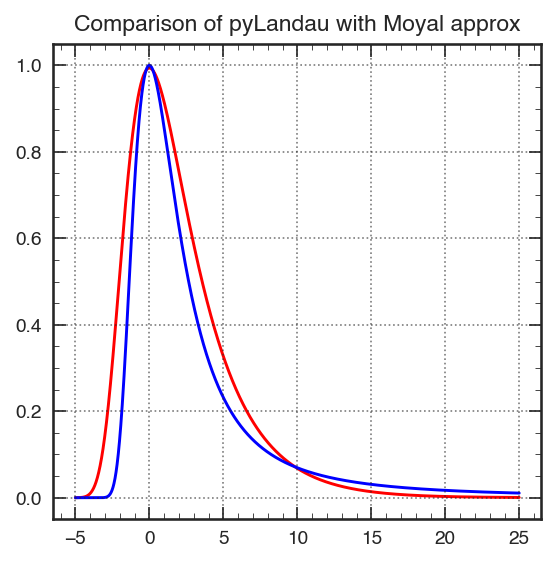

In [420]:
plt.plot(x_landau, moyal.pdf(x_landau,0,1.5708)*6.45,'r')
plt.plot(x_landau, y_landau, 'b')
plt.title('Comparison of pyLandau with Moyal approx')
plt.show()

In [421]:
ELossX = x_landau*ScaleLossFe+PeakOffsetFe
MuonP = MuonEinc-ELossX
ELossY = moyal.pdf(x_landau,0,1.5704)*6.45

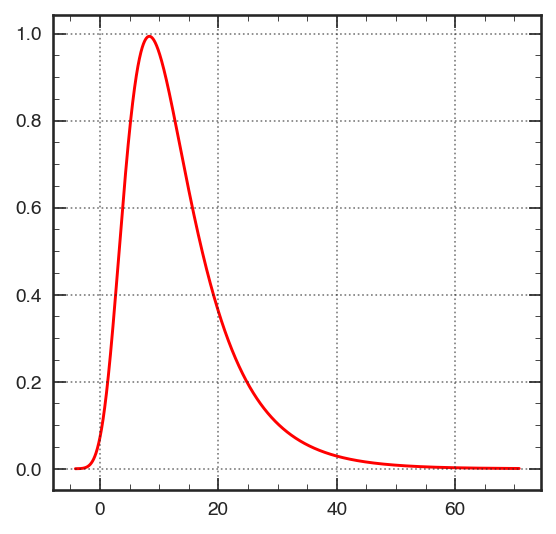

In [422]:
plt.plot(ELossX, ELossY, 'r')

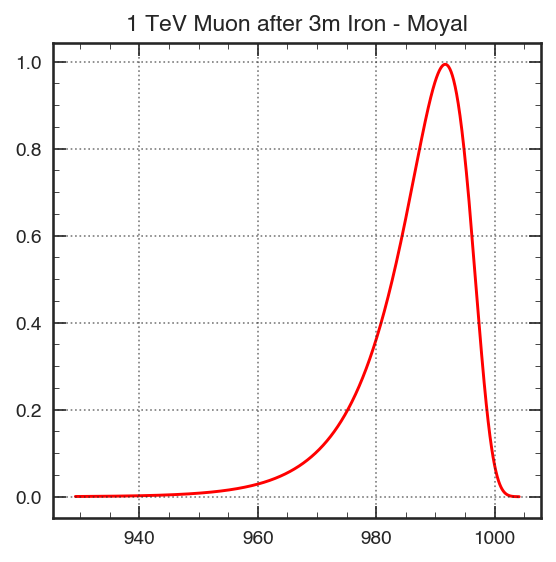

In [423]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 3m Iron - Moyal')
plt.show()

In [424]:
# Now Tungsten 6m
MuonEinc = 1000
ELossAvW = 116
PeakOffsetW = ELossAvW/2.875
ScaleLossW = ScaleLossFe*ELossAvW/ELossAvFe

In [425]:
ELossX = x_landau*ScaleLossW+PeakOffsetW
MuonP = MuonEinc-ELossX

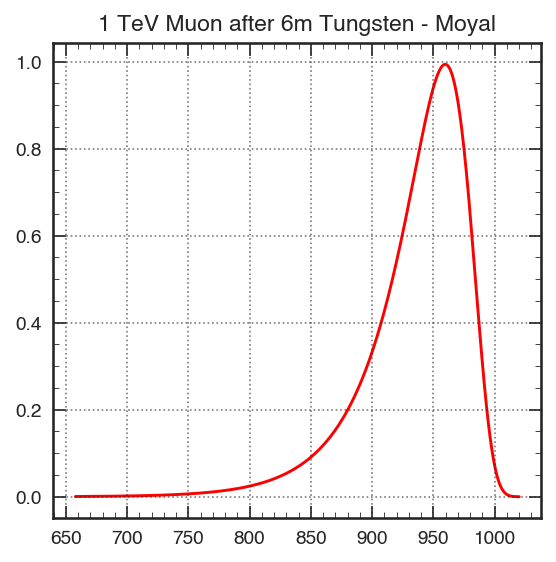

In [426]:
plt.plot(MuonP, ELossY, 'r')
plt.title('1 TeV Muon after 6m Tungsten - Moyal')
plt.show()

In [427]:
# MC Trials
Ntrial = 4000

In [428]:
rv = moyal()
r = moyal.rvs(loc=PeakOffsetW, scale=1.5704*ScaleLossW, size=Ntrial)

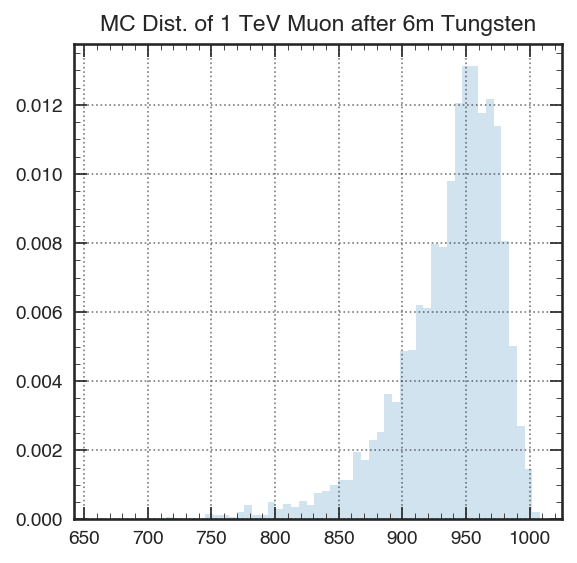

In [429]:
plt.hist(MuonEinc-r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('MC Dist. of 1 TeV Muon after 6m Tungsten')
plt.show()

In [430]:
def Q2Lepton(E, Theta, Elep, Ehad):
    return 2*E*Elep*(1+np.cos(Theta))

In [431]:
def YLepton(E, Theta, Elep, Ehad):
    return 1 - E/(2*Elep)*(1-np.cos(Theta))

In [483]:
def Eta(Theta):
    return -np.log(np.tan(Theta/2))

In [457]:
print("Q2 is: ", Q2Lepton(900., 3.136635, 1000, 275))

Q2 is:  22.120450897800126


In [458]:
print("Y is: ", YLepton(900., 3.136635, 1000, 275))

Y is:  0.1000055301127244


In [459]:
Escatt900 = 900-r

In [460]:
Q2scatt900 = Q2Lepton(Escatt900,3.136635, 1000, 275)

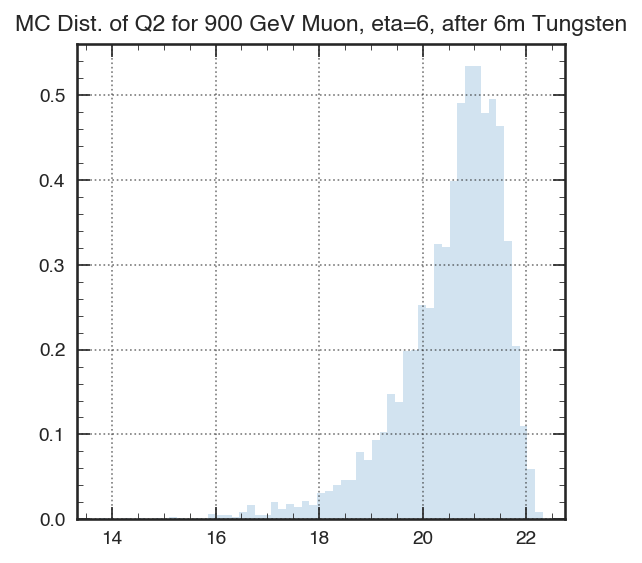

In [461]:
plt.hist(Q2scatt900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('MC Dist. of Q2 for 900 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

In [462]:
print("Q2 is: ", Q2Lepton(500., 3.136635, 1000, 275))

Q2 is:  12.289139387666737


In [463]:
print("Y is: ", YLepton(500., 3.136635, 1000, 275))

Y is:  0.500003072284847


In [464]:
# Assume same energy loss, but it will be a bit less as further down ionization curve. ~25% ?
Escatt500 = 500-r

In [465]:
Q2scatt500 = Q2Lepton(Escatt,3.136635, 1000, 275)

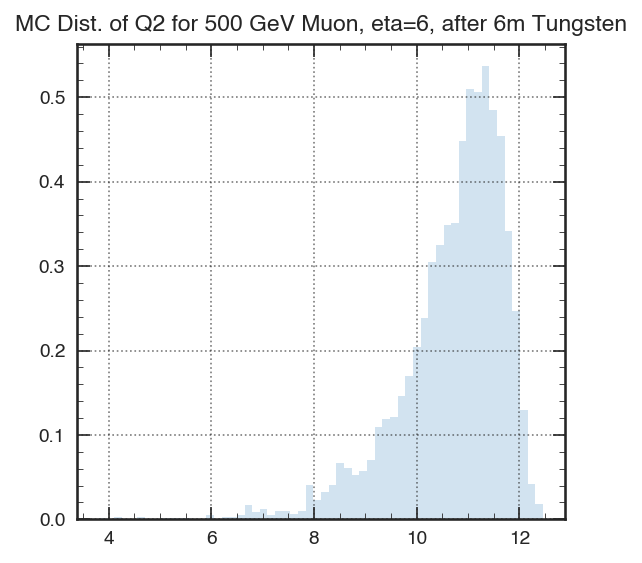

In [466]:
plt.hist(Q2scatt500, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('MC Dist. of Q2 for 500 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

In [467]:
# Now multiple scattering in 6m of Tungsten

In [468]:
SigmaTheta900 = 0.000802392 # 900 GeV

In [469]:
SigmaTheta500 = 0.001444305 # 500 GeV

In [450]:
Th900 = np.random.normal(3.136635, SigmaTheta900, Ntrial)

In [451]:
Th500 = np.random.normal(3.136635, SigmaTheta500, Ntrial)

In [484]:
eta500 = Eta(Th500)
eta900 = Eta(Th900)

/var/folders/qb/dyk63sq96gs3fzj7h8qdcfvm0000gn/T/ipykernel_33785/2057946535.py:2: RuntimeWarning: invalid value encountered in log
  return -np.log(np.tan(Theta/2))


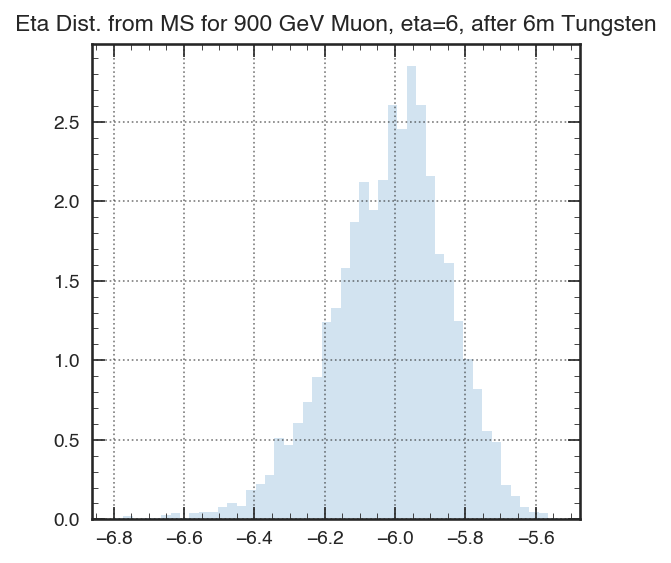

In [485]:
plt.hist(eta900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 900 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

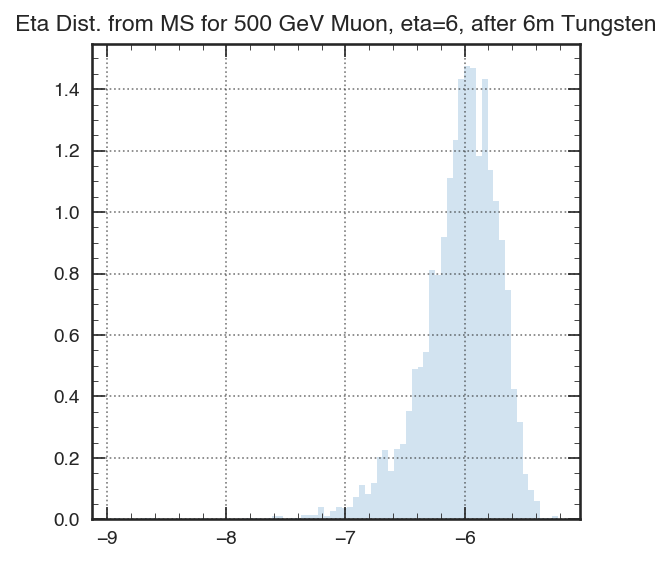

In [486]:
plt.hist(eta500, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Eta Dist. from MS for 500 GeV Muon, eta=6, after 6m Tungsten')
plt.show()

In [452]:
Q2scatt900 = Q2Lepton(Escatt900,Th900, 1000, 275)

In [453]:
Q2scatt500 = Q2Lepton(Escatt500,Th500, 1000, 275)

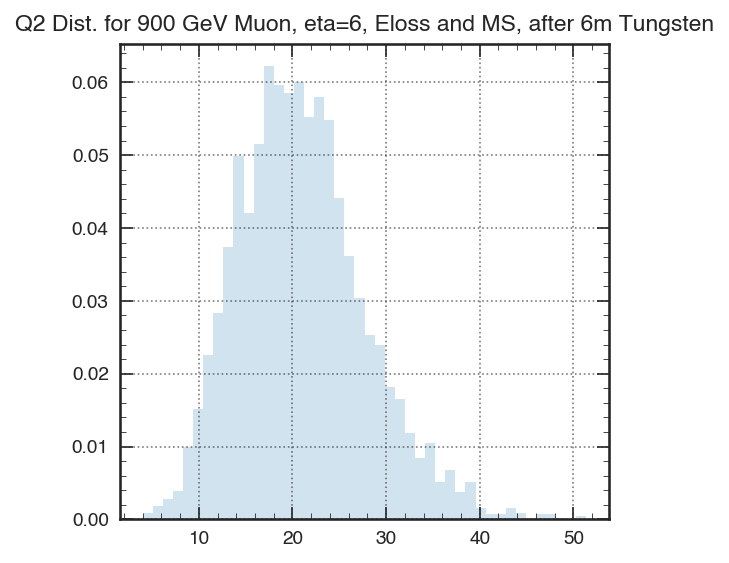

In [454]:
plt.hist(Q2scatt900, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Q2 Dist. for 900 GeV Muon, eta=6, Eloss and MS, after 6m Tungsten')
plt.show()

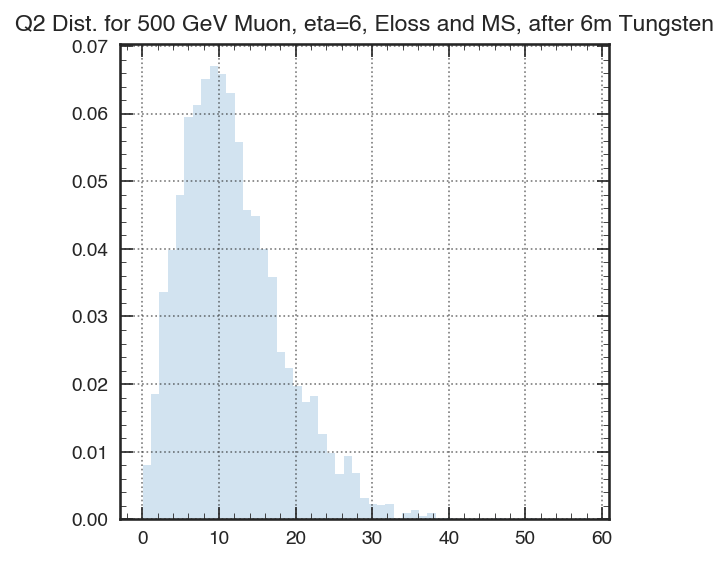

In [455]:
plt.hist(Q2scatt500, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.title('Q2 Dist. for 500 GeV Muon, eta=6, Eloss and MS, after 6m Tungsten')
plt.show()

In [ ]:
# Angle smearing seems to have large impact than energy loss and smearing!